# Analyzing Domestic Enrollment Decline at the University of Southern Mississippi.

This data analysis explores undergraduate enrollment patterns over the last decade (2015–2024) at **The University of Southern Mississippi**, using data from the Common Data Set (CDS). We focus on racial and ethnic breakdowns of enrollment and investigate how these trends compare to other leading public institutions in Mississippi — namely **Mississippi State University (MSU)** and **The University of Mississippi (Ole Miss)**.

#### Research Objectives

- Analyze long-term enrollment shifts at USM.
- Compare racial/ethnic enrollment trends across USM, MSU, and Ole Miss.
- Investigate whether declining enrollment correlates with changes in:
  - **Tuition Fees**
  - **Need-based Financial Aid**
  - **Admission Selectivity** (acceptance rate & yield)
  
This notebook uses structured CDS data for 10 academic years across multiple dimensions — **race**, **admissions**, **tuition**, and **financial aid** — to reveal patterns in higher education access and demographics within Mississippi's public university system.

---

# 1. Load and Preview Enrollment Dataset

In [301]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
file_path = "/Users/abhishekray/Documents/Enrollment_Trend_Analyisis/Datasets/CSV/university_enrollment_by_race_2015_2024.csv"  
df = pd.read_csv(file_path)

In [302]:
df.head()

,Year,University,Race or Ethnicity,Degree-Seeking First-Time First Year,Degree-Seeking Undergraduates (include first-time first-year),Total Undergraduates (both degree- and non-degree-seeking)
0,2015,The University of Southern Mississippi,Nonresident aliens,36,127,127
1,2015,The University of Southern Mississippi,Hispanic/Latino,52,365,370
2,2015,The University of Southern Mississippi,"Black or African American, non-Hispanic",505,"3,530","3,570"
3,2015,The University of Southern Mississippi,"White, non-Hispanic",859,"7,179","7,231"
4,2015,The University of Southern Mississippi,"American Indian or Alaska Native, non-Hispanic",8,44,44


# 2. Analyzing USM Enrollment Trends of Undergraduate Students.

### 2.1 Data Cleaning and Preparation

To ensure accurate analysis, we performed a series of preprocessing steps on the dataset:

#### Cleaning Workflow

- **Dropped unnecessary columns**: Removed `Degree-Seeking First-Time First Year` and `Total Undergraduates (both degree- and non-degree-seeking)` since they were not directly used in our trend analysis.
- **Standardized numeric entries**: Removed commas and leading/trailing whitespaces from the column `Degree-Seeking Undergraduates (include first-time first-year)` to ensure correct type conversion.
- **Converted data types**: Transformed cleaned string values into numeric format.
- **Removed incomplete records**: Dropped rows with missing values in the key column to maintain integrity in time series analysis.
- **Final formatting**: Converted the cleaned enrollment figures into integer type for readability.

This cleaning step prepares the dataset for consistent and accurate trend visualizations, especially when comparing enrollment patterns across universities and demographic groups.

In [303]:
# Drop the two unwanted columns
df.drop([
    'Degree-Seeking First-Time First Year',
    'Total Undergraduates (both degree- and non-degree-seeking)'
], axis=1, inplace=True)

#Remove commas and whitespaces from data
df['Degree-Seeking Undergraduates (include first-time first-year)'] = (
    df['Degree-Seeking Undergraduates (include first-time first-year)']
    .astype(str)
    .str.replace(',', '')
    .str.strip()
)

# Convert to numeric (float)
df['Degree-Seeking Undergraduates (include first-time first-year)'] = pd.to_numeric(
    df['Degree-Seeking Undergraduates (include first-time first-year)'],
    errors='coerce'
)
# Drop NaNs. Remove rows with missing values.
df.dropna(subset=['Degree-Seeking Undergraduates (include first-time first-year)'], inplace=True)

# Convert to int
df['Degree-Seeking Undergraduates (include first-time first-year)'] = df['Degree-Seeking Undergraduates (include first-time first-year)'].astype(int)

#check the modified clean result
df.head()

,Year,University,Race or Ethnicity,Degree-Seeking Undergraduates (include first-time first-year)
0,2015,The University of Southern Mississippi,Nonresident aliens,127
1,2015,The University of Southern Mississippi,Hispanic/Latino,365
2,2015,The University of Southern Mississippi,"Black or African American, non-Hispanic",3530
3,2015,The University of Southern Mississippi,"White, non-Hispanic",7179
4,2015,The University of Southern Mississippi,"American Indian or Alaska Native, non-Hispanic",44


### 2.2 Creating a Generalized Enrollment Trend Plotting Function

To streamline our analysis, we created a reusable function that:
- Filters the dataset by university and race/ethnicity (or TOTAL)
- Plots enrollment trends over a 10-year period (2015–2024)
- Calculates and prints the percentage change in enrollment from 2015 to 2024

This modular approach ensures consistent formatting and makes it easier to compare trends across different demographic groups.

In [311]:
def plot_enrollment_trend(df, university, race):
    # Filter the data for selected university and race
    subset = df[
        (df['University'] == university) &
        (df['Race or Ethnicity'] == race)
    ]

    # Sort by year (important for line plots)
    subset = subset.sort_values(by='Year')

    # Labeling and Formatting Graph Attributes
    plt.figure(figsize=(10, 5))
    plt.title(f"{race} Enrollment Trend at {university}")
    plt.xlabel("Academic Year")
    plt.ylabel("Total Degree-Seeking Undergraduates")
    plt.xticks(np.arange(2015, 2025, 1))
    plt.grid(True)

    # Plotting  
    plt.plot(subset['Year'], subset['Degree-Seeking Undergraduates (include first-time first-year)'], marker='o', linestyle='-', color='#DAA520')
    plt.show()

    # Return trend table
    enrollment_2015 = subset[subset['Year'] == 2015]['Degree-Seeking Undergraduates (include first-time first-year)'].iloc[0]
    enrollment_2024 = subset[subset['Year'] == 2024]['Degree-Seeking Undergraduates (include first-time first-year)'].iloc[0]
    percent_change = ((enrollment_2024 - enrollment_2015) / enrollment_2015) * 100

    summarydf = pd.DataFrame({
        '2015': [enrollment_2015],
        '2024': [enrollment_2024],
        '%Change': [round(percent_change, 1)]
    })
    print(summarydf)

### 2.3 Total Undergraduate Enrollment Trend at USM (2015–2024)

Let's begin by examining the overall trend in undergraduate enrollment at The University of Southern Mississippi over the past decade. This includes all degree-seeking undergraduates, regardless of race or ethnicity.

The graph below shows the total number of enrolled students each year, and a summary table provides the enrollment figures for 2015 and 2024, along with the percentage change.

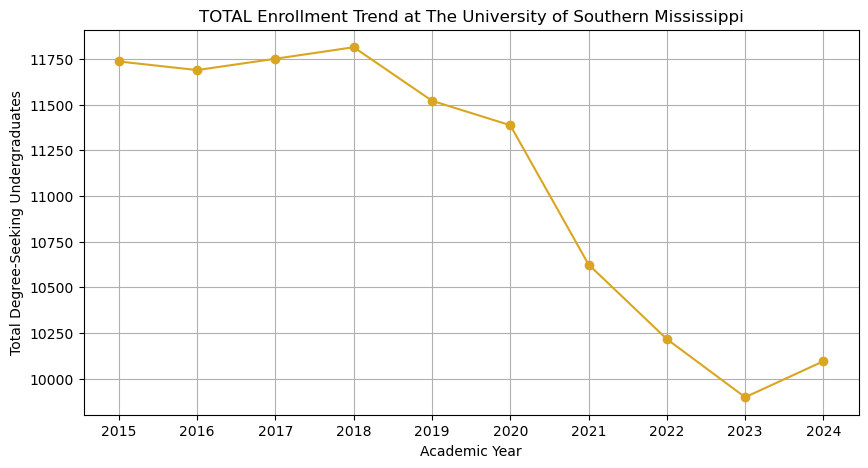

    2015   2024  %Change
0  11736  10096    -14.0


In [305]:
plot_enrollment_trend(df, 'The University of Southern Mississippi', 'TOTAL')

> **Insight:** Total undergraduate enrollment at USM decreased from 11,736 in 2015 to 10,096 in 2024 — a **14% decline** over the decade. This downward trend sets the stage for a deeper look into which student groups are contributing most to this change.

### 2.4 Analyzing Undergraduate Enrollment Trends by Race at USM

To understand which groups are driving the overall enrollment trend, let's visualize trends separately for major racial and ethnic demographics at USM:

- **White, non-Hispanic**
- **Black or African American, non-Hispanic**
- **Hispanic/Latino**
- **Nonresident Aliens (International students)**

This helps uncover whether the decline in total enrollment is spread evenly or concentrated in specific groups.

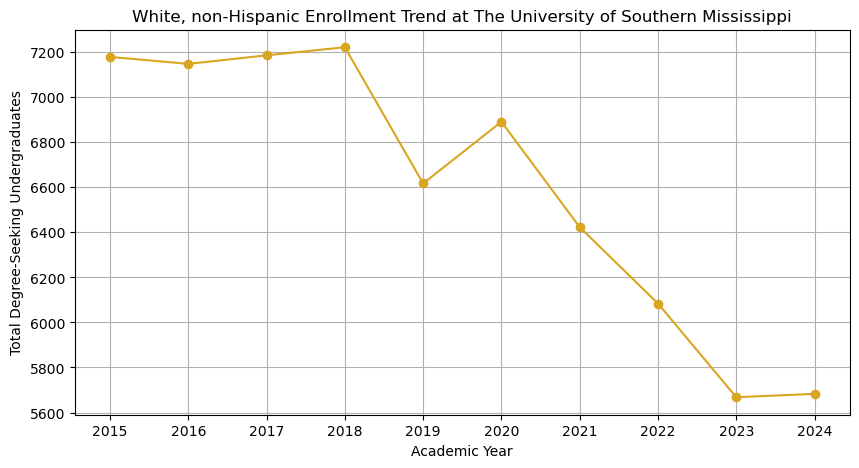

   2015  2024  %Change
0  7179  5683    -20.8


In [306]:
plot_enrollment_trend(df, 'The University of Southern Mississippi', 'White, non-Hispanic')

>  **Insight:** Enrollment of White, non-Hispanic students at USM fell by **20.8%**, from 7,179 in 2015 to 5,683 in 2024 — a major contributor to the overall decline.

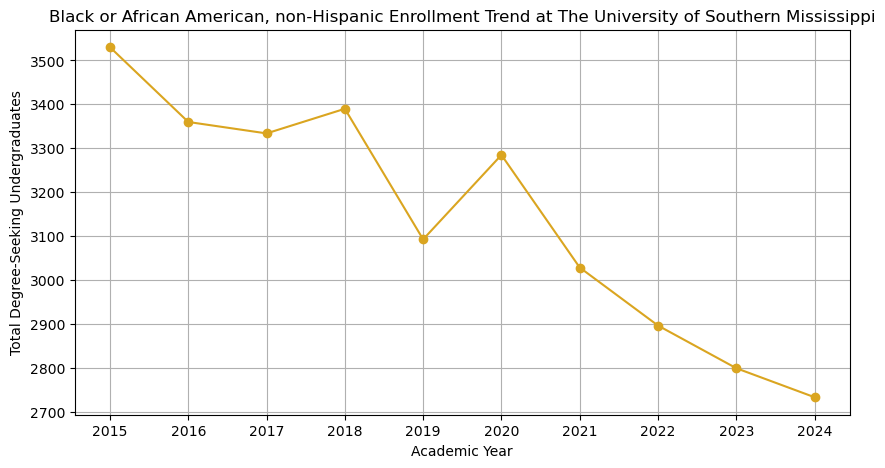

   2015  2024  %Change
0  3530  2734    -22.5


In [307]:
plot_enrollment_trend(df, 'The University of Southern Mississippi', 'Black or African American, non-Hispanic')

> **Insight:** Black enrollment at USM also dropped significantly — from `3,530` in 2015 to `2,734` in 2024, a decline of `22.5%`. This makes it one of the most affected demographic groups in the university's enrollment landscape.


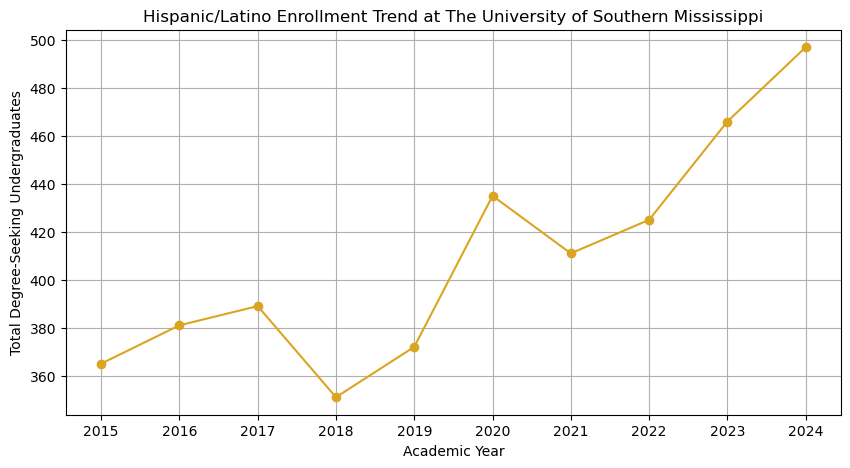

   2015  2024  %Change
0   365   497     36.2


In [308]:
plot_enrollment_trend(df, 'The University of Southern Mississippi', 'Hispanic/Latino')

> **Insight:** In contrast, Hispanic/Latino student enrollment increased from 365 in 2015 to 497 in 2024 — a 36.2% rise. This steady growth signals expanding representation among USM’s undergraduate population.

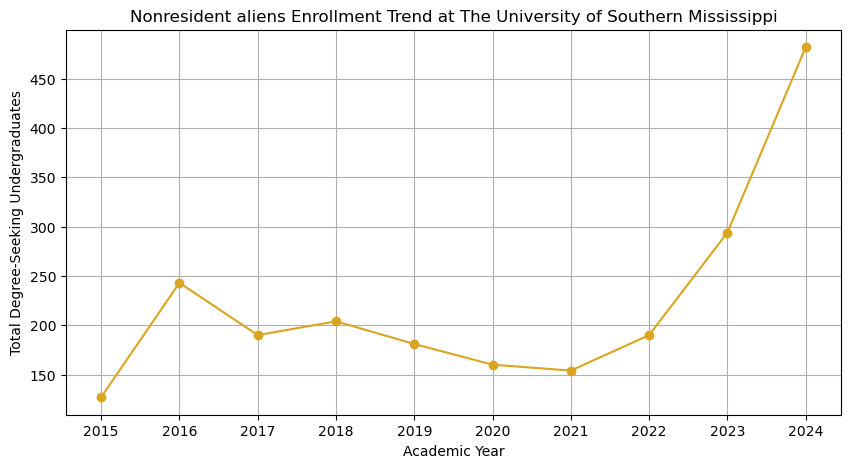

   2015  2024  %Change
0   127   482    279.5


In [309]:
plot_enrollment_trend(df, 'The University of Southern Mississippi', 'Nonresident aliens')

> **Insight:** Enrollment of international students increased sharply from 127 in 2015 to 482 in 2024 — a 279.5% rise. 

### 2.5 Summary: Demographic Shifts at USM

The breakdown of racial enrollment trends at The University of Southern Mississippi reveals a clear divergence:

- **White** and **Black** student enrollment have both declined steadily over the last decade.
- Meanwhile, **Hispanic/Latino** and **International (Nonresident)** student populations have shown consistent growth.

These trends suggest that USM is experiencing a demographic reshaping, potentially due to changing population dynamics, recruitment strategies, or shifting student preferences.

To assess whether these patterns are isolated to USM or part of a broader statewide trend, let's now expand the analysis to compare enrollment shifts across Mississippi's top three public universities.

# 3. Comparing Enrollment Trends Across Mississippi’s Top Universities

### 3.1 Creating a Generalized Enrollment Comparison Function
This function:

- Plots the enrollment trend of a selected **race/ethnicity** or (TOTAL)
- Across **The University of Southern Mississippi**, **Mississippi State University**, and **The University of Mississippi**
- Uses each university's official mascot color for visual clarity

By standardizing the format and scale, let's make meaningful cross-institutional comparisons that reveal broader systemic trends within public higher education in Mississippi.

In [318]:
def compare_race_enrollment_across_universities(df, race, universities):
    # Define mascot colors
    mascot_colors = {
        "The University of Southern Mississippi": "#DAA520",  # Golden Yellow
        "University of Mississippi": "#CE1126",               # Ole Miss Red
        "Mississippi State University": "#5D1725"             # MSU Maroon
    }

    plt.figure(figsize=(10, 6))
    plt.title(f"{race} Enrollment Comparison Across Universities (2015–2024)")
    plt.xlabel("Academic Year")
    plt.ylabel("Total Degree-Seeking Undergraduates")
    plt.xticks(np.arange(2015, 2025, 1))
    plt.grid(True)

    for university in universities:
        subset = df[
            (df['University'] == university) &
            (df['Race or Ethnicity'] == race)
        ].sort_values(by='Year')

        color = mascot_colors.get(university, None)

        plt.plot(
            subset['Year'],
            subset['Degree-Seeking Undergraduates (include first-time first-year)'],
            marker='o',
            linestyle='-',
            label=university,
            color=color
        )

    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Simple summary table for 2015 and 2024
    summary_rows = []

    for university in universities:
        subset = df[
            (df['University'] == university) &
            (df['Race or Ethnicity'] == race)
        ].sort_values(by='Year')

        val_2015 = subset[subset['Year'] == 2015]['Degree-Seeking Undergraduates (include first-time first-year)'].values[0]
        val_2024 = subset[subset['Year'] == 2024]['Degree-Seeking Undergraduates (include first-time first-year)'].values[0]
        percent_change = ((val_2024 - val_2015) / val_2015) * 100

        summary_rows.append({
            'University': university,
            '2015': int(val_2015),
            '2024': int(val_2024),
            '% Change': round(percent_change, 1)
        })

    summary_df = pd.DataFrame(summary_rows)
    print(summary_df.to_string(index=False))

### 3.2 Comparing Enrollment Trends by Race (2015–2024)

After comparing total enrollment trend across these universities, let's apply the comparison function across the four most revealing demographic categories. 

- **TOTAL** (all races combined)
- **White, non-Hispanic**
- **Black or African American, non-Hispanic**
- **Hispanic/Latino**
- **Nonresident aliens (international students)**

These comparisons allow us to see whether demographic enrollment shifts at USM are also occurring at peer institutions: Mississippi State University (MSU) and the University of Mississippi (Ole Miss).

In [319]:
universities = [
    "The University of Southern Mississippi",
    "University of Mississippi",
    "Mississippi State University"
]

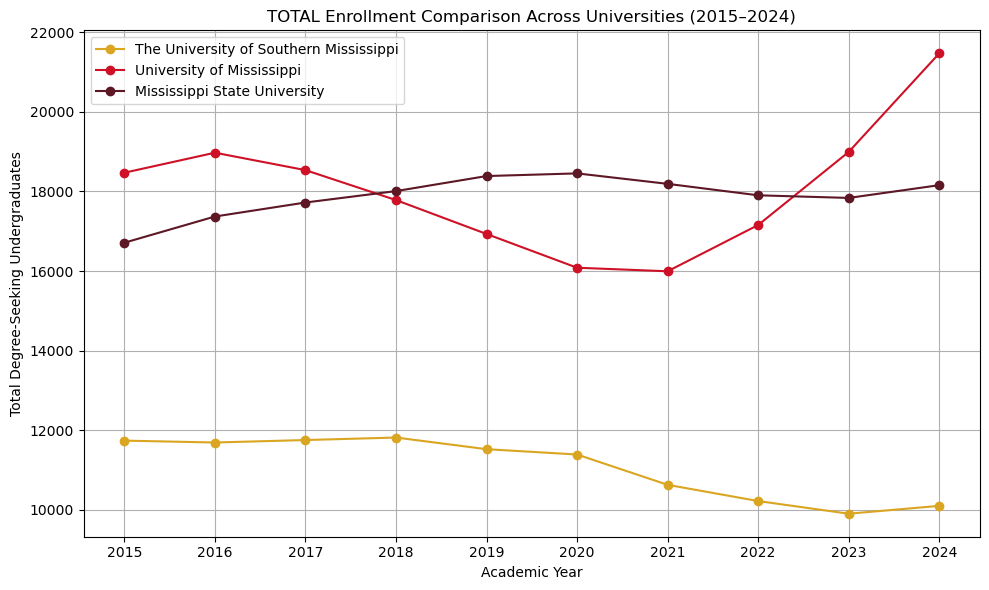

                            University  2015  2024  % Change
The University of Southern Mississippi 11736 10096     -14.0
             University of Mississippi 18472 21473      16.2
          Mississippi State University 16712 18159       8.7


In [320]:
compare_race_enrollment_across_universities(df, "TOTAL", universities)

> **Insight – Total Enrollment:** USM's total undergraduate enrollment declined by 14.0% (from 11,736 to 10,096). Meanwhile, Ole Miss grew by 16.2% and Mississippi State increased by 8.7%. This shows that USM's decline is not reflective of a statewide downturn — it's a university-specific issue.

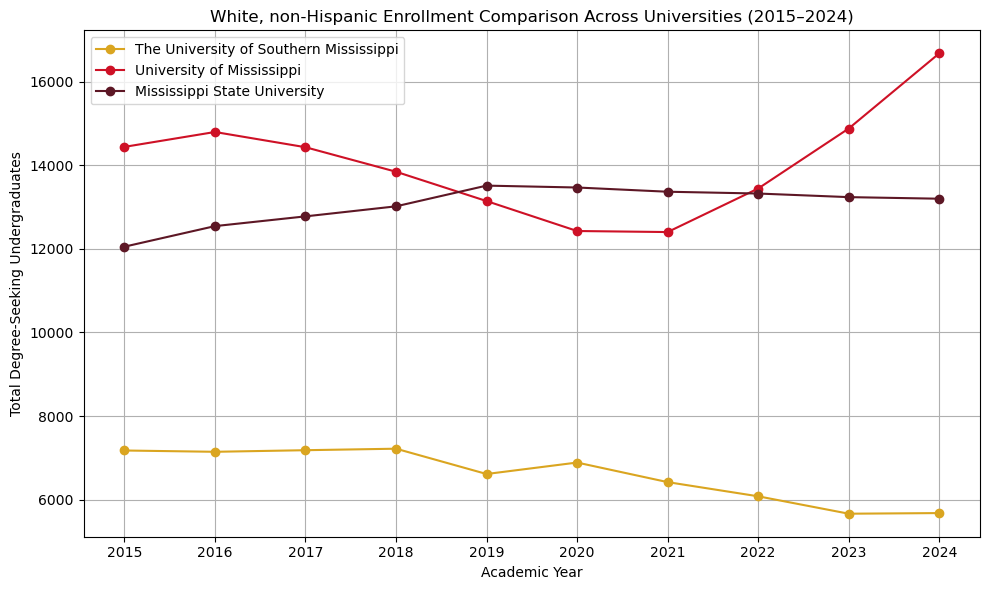

                            University  2015  2024  % Change
The University of Southern Mississippi  7179  5683     -20.8
             University of Mississippi 14437 16673      15.5
          Mississippi State University 12051 13198       9.5


In [321]:
compare_race_enrollment_across_universities(df, "White, non-Hispanic", universities)

> **Insight – White Students:** White, non-Hispanic enrollment at USM dropped by 20.8%, while Ole Miss saw a 15.5% increase, and Mississippi State rose slightly by 9.5%. This suggests a clear divergence in how these institutions attract and retain White students.

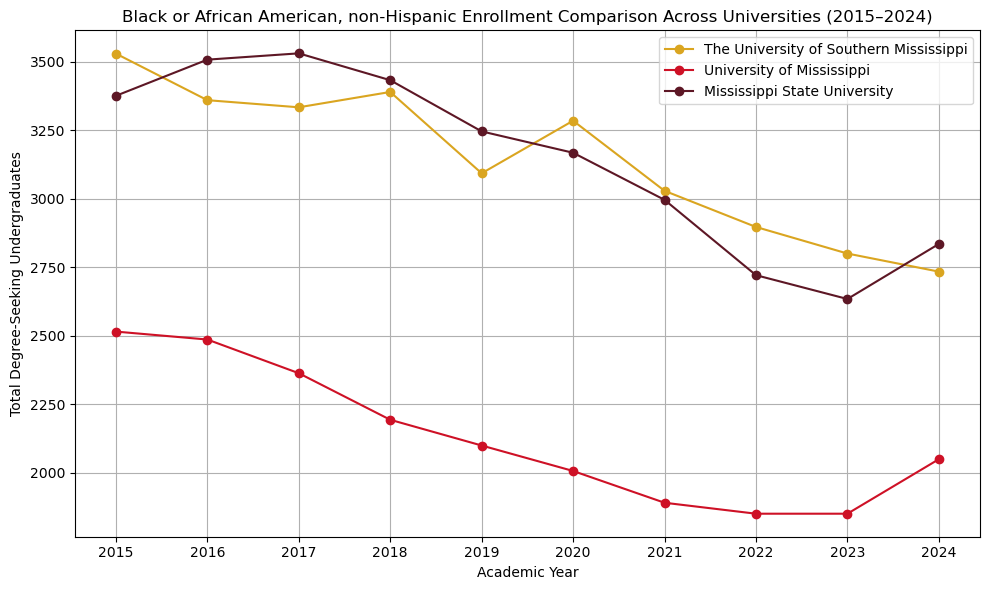

                            University  2015  2024  % Change
The University of Southern Mississippi  3530  2734     -22.5
             University of Mississippi  2515  2049     -18.5
          Mississippi State University  3376  2835     -16.0


In [322]:
compare_race_enrollment_across_universities(df, "Black or African American, non-Hispanic", universities)

> **Insight – Black Students:** Black enrollment declined across the board — by 22.5% at USM, 18.5% at Ole Miss, and 16.0% at MSU. This indicates a broader statewide issue in maintaining Black student enrollment, not one unique to USM.

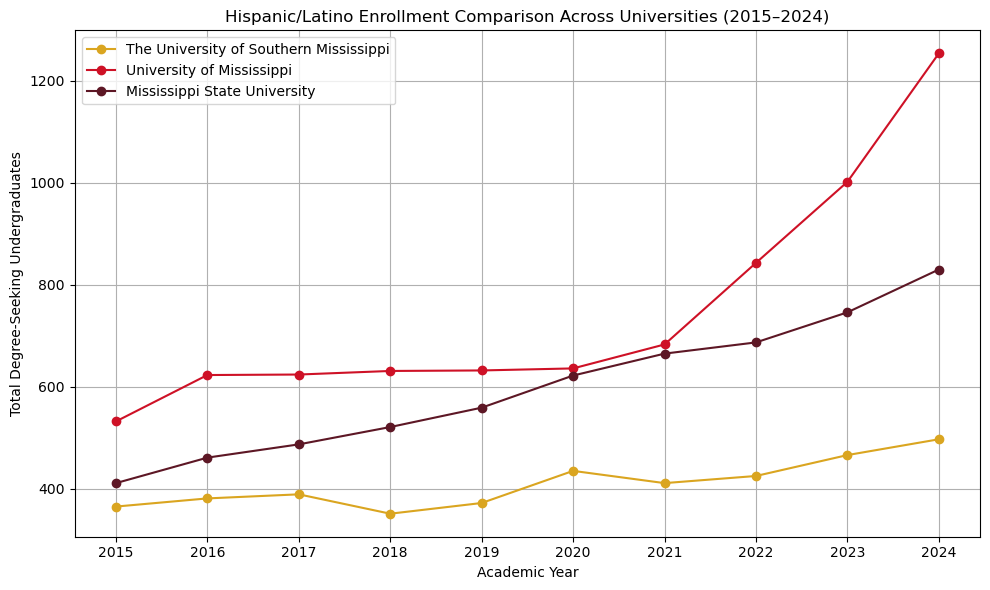

                            University  2015  2024  % Change
The University of Southern Mississippi   365   497      36.2
             University of Mississippi   532  1254     135.7
          Mississippi State University   411   830     101.9


In [323]:
compare_race_enrollment_across_universities(df, "Hispanic/Latino", universities)

> **Insight – Hispanic Students:** Hispanic/Latino enrollment grew at all three institutions: 36.2% at USM, 135.7% at Ole Miss, and 101.9% at MSU. This aligns with national trends of increasing Hispanic college-going populations and improved outreach.

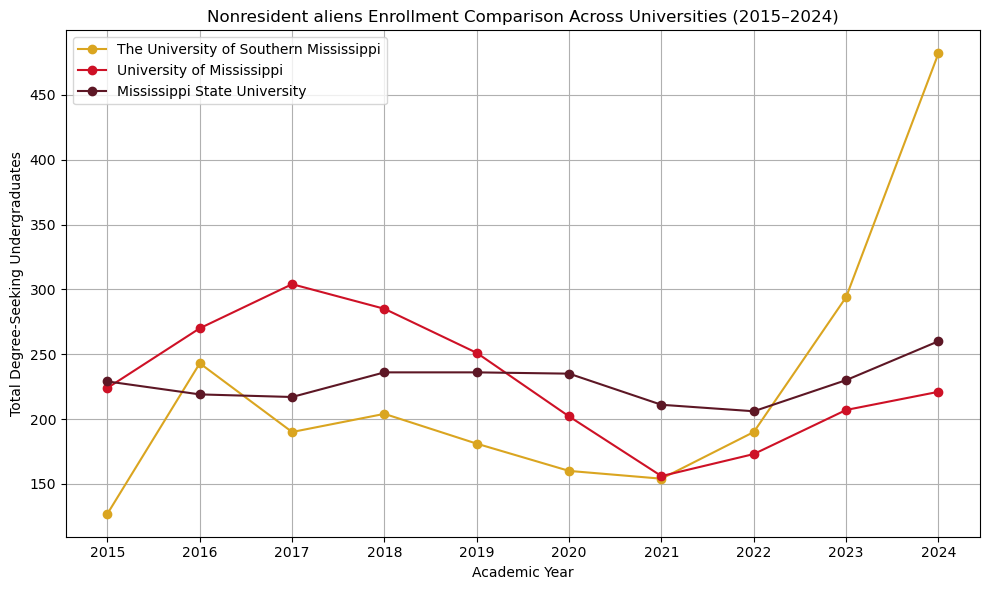

                            University  2015  2024  % Change
The University of Southern Mississippi   127   482     279.5
             University of Mississippi   224   221      -1.3
          Mississippi State University   229   260      13.5


In [324]:
compare_race_enrollment_across_universities(df, "Nonresident aliens", universities)

> **Insight – International Students:** USM experienced a dramatic 279.5% increase in international enrollment (from 127 to 482), far outpacing MSU's 101.9% growth. Ole Miss saw a slight decline by 1.3%. This suggests USM might be intentionally bolstering international recruitment to offset domestic declines.

### Summary of Enrollment Analysis across universities.

Over the past decade, the University of Southern Mississippi (USM) has experienced a consistent decline in total undergraduate enrollment. This trend sets it apart from its peer institutions — the University of Mississippi and Mississippi State University — which both expanded their student populations during the same period.

A key factor in USM’s decline is the loss of White students. While peer universities saw stable or growing White enrollment, USM experienced a noticeable contraction, suggesting a shift in where this demographic is choosing to enroll — or in how institutions are attracting them.

Black student enrollment has declined not just at USM, but across all three major universities in the state. This points to a broader statewide challenge in sustaining Black undergraduate participation, rather than an issue unique to one campus.

In contrast, enrollment among Hispanic/Latino students has grown steadily at all three institutions. This growth mirrors national demographic changes and reflects expanding college access and outreach to these communities.

The most dramatic enrollment shift at USM has come from international students. While all institutions have increased their nonresident enrollment to some degree, USM’s growth in this area far exceeds that of its peers, indicating a deliberate strategic pivot toward international recruitment.

---

#### Where USM Stands?

USM is not simply seeing lower numbers — it is experiencing a demographic reconfiguration. The university is enrolling fewer domestic students from its traditional in-state pipelines while gaining new momentum from international and Hispanic populations. This reflects both a challenge and an opportunity: USM must respond not just to declining interest, but to a changing definition of who its students are and what they need.

---

#### Investigating the Causes

These shifts raise an important question: why is USM struggling to retain and attract domestic students while its peers are not? The following sections explore possible causes — including affordability, financial support, and institutional competitiveness — to better understand what may be driving this change, and what USM can do about it.

# 4. Investigating Possible Causes of Enrollment Decline
After identifying clear declines in enrollment — especially among White and Black students — let's now explore whether key institutional or economic factors may be contributing to the trend.

This section evaluates:

- **Rising tuition costs**: Has college affordability worsened over time?
- **Need-based financial aid**: Has financial support kept pace with cost?
- **Admissions competitiveness**: Has USM become more or less attractive to admitted students?

Together, these dimensions help us assess whether the enrollment decline is a result of pricing, policy, or perception.

### 4.2 Investigating Tuition Fees as a Contributing Factor

A possible factor contributing to declining enrollment is the **cost of attendance**. To explore this, we examined the trend in **in-state undergraduate tuition** at the University of Southern Mississippi from 2016 to 2024.

In [292]:
# Load data
df = pd.read_csv("/Users/abhishekray/Documents/Enrollment_Trend_Analyisis/Datasets/CSV/Tuition Trend USM - Sheet1.csv")
df.head()

,Year,University,In-State Tuition,Out of State Tuition,NonResident Tuition
0,2015,The University of Southern Mississippi,NaN,NaN,NaN
1,2016,The University of Southern Mississippi,7854.0,9854.0,9854.0
2,2017,The University of Southern Mississippi,NaN,NaN,NaN
3,2018,The University of Southern Mississippi,8514.0,10514.0,10514.0
4,2019,The University of Southern Mississippi,8786.0,10786.0,10786.0


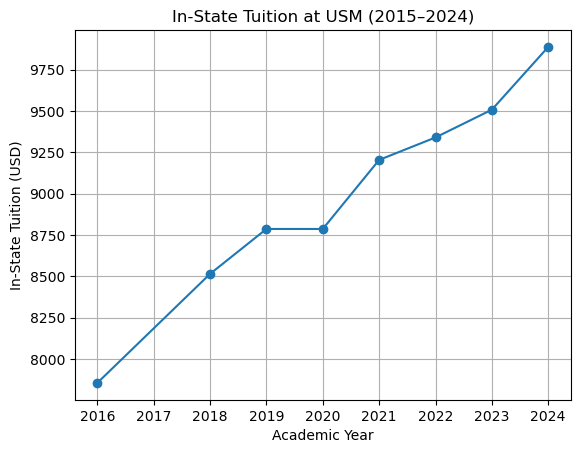

In [293]:
# Filter only valid rows with tuition data
df = df[df['University'] == 'The University of Southern Mississippi']
df = df.dropna(subset=['In-State Tuition'])

# Plot
plt.plot(df['Year'], df['In-State Tuition'], marker='o')
plt.title("In-State Tuition at USM (2015–2024)")
plt.xlabel("Academic Year")
plt.ylabel("In-State Tuition (USD)")
plt.grid(True)
plt.show()

> **Insight:** In-state tuition at USM increased from `$7,854` in 2016 to `$9,888` in 2024 — a **25.9% rise**. This consistent upward trend may contribute to affordability concerns, especially for price-sensitive populations.

> However, if **need-based aid also increased during this period**, the tuition hike alone may not fully explain the enrollment decline. 

### 4.2 Investigating Financial Aid as a Contributing Factor

One possible explanation for declining enrollment — particularly among lower-income or historically underrepresented groups — is a reduction in financial support. 

To explore this, let's examine the trend of **total need-based financial aid** awarded across the university from 2015 to 2024. If aid has decreased, it could partially explain why fewer students are enrolling or persisting. If aid has increased, it would suggest that the enrollment decline is driven by other factors.

In [247]:
file_path = "/Users/abhishekray/Documents/Enrollment_Trend_Analyisis/Datasets/CSV/financial_aid_summary_2015_2024.csv"  
df = pd.read_csv(file_path)

df.head()

,Year,Fed_Need,Fed_NonNeed,State_Need,State_NonNeed,Inst_Need,Inst_NonNeed,Ext_Need,Ext_NonNeed,Total_Need,Total_NonNeed
0,2015,25769861,2603011,3390910,2753072,5758772,12386365,1289661,1542121,36209204,19284569
1,2016,25138135,2536363,3912219,2539417,6454485,12937713,1409965,1452456,36914804,19465949
2,2017,24590422,2812419,3636462,1853727,8426523,14127190,1335913,1533250,37989320,20326586
3,2018,27198467,2620466,4359123,1578511,8588261,14694684,1546910,1667944,41692761,20561605
4,2019,28116601,2594596,5330891,1704722,9129413,15784677,1665063,1869221,44241968,21953217


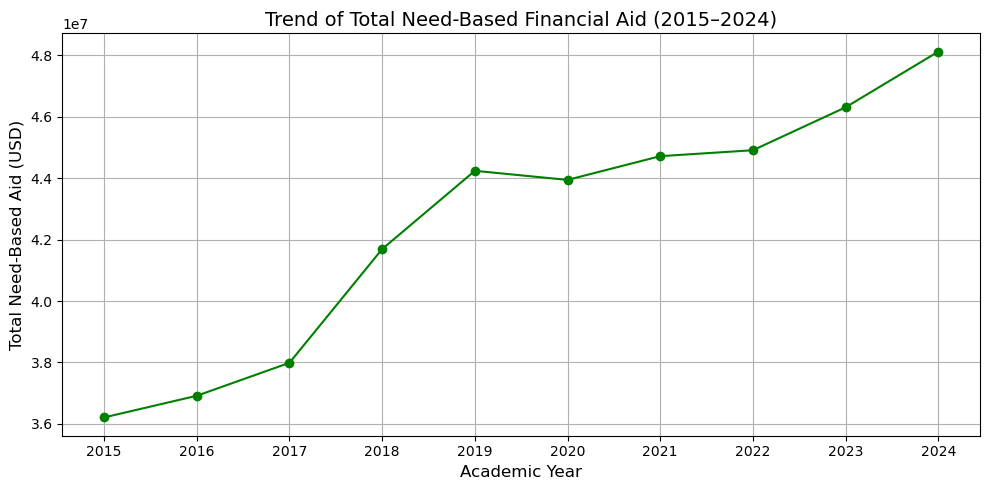

In [248]:
# Plot Total Need-Based Aid over time
plt.figure(figsize=(10, 5))
plt.plot(df['Year'], df['Total_Need'], marker='o', linestyle='-', color='green')

plt.title("Trend of Total Need-Based Financial Aid (2015–2024)", fontsize=14)
plt.xlabel("Academic Year", fontsize=12)
plt.ylabel("Total Need-Based Aid (USD)", fontsize=12)
plt.grid(True)
plt.xticks(df['Year'])  # Ensure all years from 2015 to 2024 are shown
plt.tight_layout()
plt.show()

>  **Insight:** Total need-based financial aid at USM increased significantly over the past decade — from `$36.2 million` in 2015 to `$48.1 million` in 2024 (a `32.8%` rise). This trend suggests that **USM has expanded financial support**, likely to help offset tuition increases or support enrollment retention efforts.

> Importantly, this means the decline in enrollment observed during the same period **cannot be explained by increasing trend of tuition fees**.

### 4.3 Investigating Admissions Competitiveness (Acceptance and Yield Rates) as Contributing Factors.

To assess whether USM has become more selective — or less attractive to admitted students — let's analyze two key metrics:

- **Acceptance Rate**: The percentage of applicants who are admitted.
- **Yield Rate**: The percentage of admitted students who choose to enroll.

If acceptance rates have decreased, it may suggest growing selectivity. If yield rates have fallen, it could imply that admitted students are opting to attend other institutions.

In [249]:
file_path = "/Users/abhishekray/Documents/Enrollment_Trend_Analyisis/Datasets/CSV/gender_admissions_decade.csv"  
df = pd.read_csv(file_path)

df.head()

,Year,University,Gender,Applied,Admitted,Enrolled
0,2015,University of Southern Mississippi,Male,2017.0,1136.0,497.0
1,2015,University of Southern Mississippi,Female,4029.0,2373.0,1030.0
2,2015,University of Mississippi,Male,NaN,NaN,NaN
3,2015,University of Mississippi,Female,NaN,NaN,NaN
4,2015,Mississippi State University,Male,NaN,NaN,NaN


In [250]:
df = df[df['University'] == 'University of Southern Mississippi']
df = df.dropna(subset=['Applied', 'Admitted', 'Enrolled'])

# Group by year (combine male and female)
df_grouped = df.groupby('Year')[['Applied', 'Admitted', 'Enrolled']].sum().reset_index()
df_grouped.head()

,Year,Applied,Admitted,Enrolled
0,2015,6046.0,3509.0,1527.0
1,2016,5180.0,3115.0,1504.0
2,2017,6405.0,6306.0,1903.0
3,2018,8550.0,8369.0,2080.0
4,2019,9217.0,8935.0,1888.0


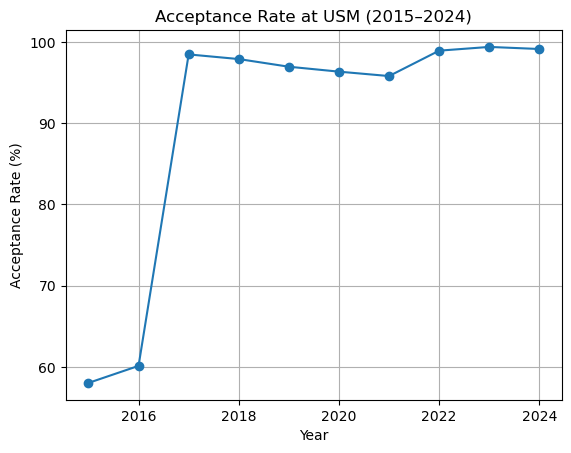

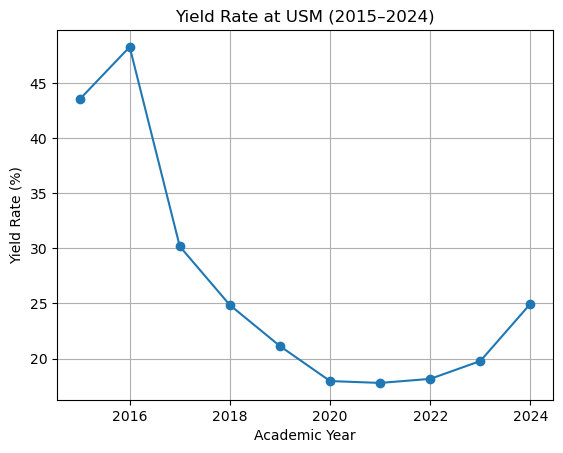

In [251]:
# Calculate acceptance and yield rates
df_grouped['Acceptance Rate'] = (df_grouped['Admitted'] / df_grouped['Applied']) * 100
df_grouped['Yield Rate'] = (df_grouped['Enrolled'] / df_grouped['Admitted']) * 100

# Plot acceptance rate
plt.plot(df_grouped['Year'], df_grouped['Acceptance Rate'], marker='o')
plt.title("Acceptance Rate at USM (2015–2024)")
plt.xlabel("Year")
plt.ylabel("Acceptance Rate (%)")
plt.grid(True)
plt.show()

# Plot yield rate
plt.plot(df_grouped['Year'], df_grouped['Yield Rate'], marker='o')
plt.title("Yield Rate at USM (2015–2024)")
plt.xlabel("Academic Year")
plt.ylabel("Yield Rate (%)")
plt.grid(True)
plt.show()

>  **Insight:** The acceptance rate at USM rose drastically from 58% in 2015 to over 95% after 2017, signaling a shift toward more open admissions — likely an institutional response to enrollment challenges. Meanwhile, the yield rate — the percentage of admitted students who enroll — declined from 43.5% in 2015 to just 17.8% in 2021, with only a modest recovery to 25% by 2024.

> Together, these trends suggest that **USM is admitting more students than ever before, but a shrinking proportion of them are choosing to enroll**. This points to issues of institutional competitiveness, student preferences, or perceived value — rather than stricter admissions — as drivers of the enrollment decline.

## 🧾 Conclusion

This analysis began with a simple observation: undergraduate enrollment at the University of Southern Mississippi (USM) has been declining over the last decade. But through data, comparison, and interpretation, a more complex and meaningful story was uncovered.

The decline at USM is not uniform across all groups — it is most pronounced among White and Black students, signaling a shift in the university's appeal among core domestic populations. Meanwhile, peer institutions like Ole Miss and Mississippi State have managed not only to maintain but grow their enrollments in those same groups. At the same time, USM has experienced sharp increases in Hispanic and international student populations, suggesting a pivot toward broader recruitment or a demographic realignment in who the university serves.

Upon investigating institutional factors that could influence these trends, we found that tuition at USM has steadily increased, but so has need-based financial aid. This suggests that affordability, while a challenge, may not fully explain the enrollment drop. Similarly, admissions competitiveness has not increased; in fact, acceptance rates have become more generous. However, yield rates — the percentage of admitted students who actually enroll — have fallen, pointing to a deeper issue of institutional perception or competition in the higher education landscape.

Together, the evidence suggests that USM is facing not just a statistical decline but a **strategic turning point**. Its core student demographics are shifting. Its traditional base is contracting. And its peer institutions are adapting more effectively to similar statewide and national changes.

The path forward may require USM to reevaluate how it defines value to prospective students, how it positions its programs, and how it builds a long-term enrollment strategy that balances access, diversity, and competitiveness.

This analysis provides a foundation for deeper institutional reflection — and for future studies to examine not just **how enrollment is changing**, but **why students are choosing differently**.
